# Analisis Klasifikasi Kategori Pada Portal Berita [Kompas.com](https://www.kompas.com/) Berbahasa Indonesia Menggunakan Algoritma Naive Bayes Classfier

**Anggota Kelompok B2 Kelas A**

1. Zul Fadli Ahmad
2. Ahmad Gazali.Z
3. Muhammad Maulana

# Langkah 1 - Persiapan Library

In [ ]:
!pip install Sastrawi nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
# Import library yang umum digunakan
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import subprocess
import string
import re
import os

In [ ]:
# Import library yang digunana untuk preprocessing
import nltk
nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
# Import library yang digunakan untuk melatih model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Import library yang digunakan untuk scaping berita baru untuk tes model
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Langkah 2 - Persiapan Dataset

In [ ]:
# Membuat directory untuk menyimpan file jika belum ada
directory = "/content/data"
if not os.path.exists(directory):
    os.makedirs(directory)

# URL file yang ingin didownload
url = "https://github.com/zumaku/Text-Mining/raw/main/01%20-%20Homework/Tugas%203%20-%20Mini%20Project%20Part%201/Data%20Berita%20Kompas.csv"

# Menggunakan wget untuk mendownload file
file_path = os.path.join(directory, "Data_Berita_Kompas.csv")
subprocess.run(["wget", "-O", file_path, url])

# Memastikan file terdownload dengan benar
if os.path.exists(file_path):
    print(f"File telah terdownload dan tersimpan di {file_path}")
else:
    print("Terjadi kesalahan dalam mendownload file")

File telah terdownload dan tersimpan di /content/data/Data_Berita_Kompas.csv


# Langkah 3 - Preprocessing

In [ ]:
# Import Data
berita = pd.read_csv("/content/data/Data_Berita_Kompas.csv")
berita.head()

,class,content
0,gadget,KOMPAS.com - Realme GT 6 baru saja diluncurkan...
1,gadget,MILAN KOMPAS.com - Realme GT 6 resmi debut glo...
2,gadget,KOMPAS.com - Smartwatch Samsung Galaxy Watch F...
3,gadget,"MILAN, KOMPAS.com - Realme meluncurkan ponsel ..."
4,gadget,"MILAN, KOMPAS.com - Realme GT 6 resmi dirilis ..."


In [ ]:
# Membuat tabel perbandingan tiap preprocessing
df_perbandingan = pd.DataFrame()
df_perbandingan['content'] = berita['content']
df_perbandingan.head()

,content
0,KOMPAS.com - Realme GT 6 baru saja diluncurkan...
1,MILAN KOMPAS.com - Realme GT 6 resmi debut glo...
2,KOMPAS.com - Smartwatch Samsung Galaxy Watch F...
3,"MILAN, KOMPAS.com - Realme meluncurkan ponsel ..."
4,"MILAN, KOMPAS.com - Realme GT 6 resmi dirilis ..."


## 3.1 - Case Folding

In [ ]:
# Mengubah menjadi huruf kecil
berita = berita.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Menghapus angka
berita['content'] = berita['content'].apply(lambda x: re.sub(r"\d+", "", x) if isinstance(x, str) else x)

# Menghapus tanda baca
berita['content'] = berita['content'].apply(lambda x: x.translate(str.maketrans("","",string.punctuation)) if isinstance(x, str) else x)

# Menghapus whitespace
berita['content'] = berita['content'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Menampilkan Perbandingan
df_perbandingan['case_folding'] = berita['content']
df_perbandingan.head()

,content,case_folding
0,KOMPAS.com - Realme GT 6 baru saja diluncurkan...,kompascom realme gt baru saja diluncurkan se...
1,MILAN KOMPAS.com - Realme GT 6 resmi debut glo...,milan kompascom realme gt resmi debut global...
2,KOMPAS.com - Smartwatch Samsung Galaxy Watch F...,kompascom smartwatch samsung galaxy watch fe ...
3,"MILAN, KOMPAS.com - Realme meluncurkan ponsel ...",milan kompascom realme meluncurkan ponsel fla...
4,"MILAN, KOMPAS.com - Realme GT 6 resmi dirilis ...",milan kompascom realme gt resmi dirilis mela...


## 3.2 - Stopword Removal

In [ ]:
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

# Menghilangkan Stopword
berita['content'] = berita['content'].apply(lambda x: stopword.remove(x) if isinstance(x, str) else x)

# Menampilkan Perbandingan
df_perbandingan['stopword'] = berita['content']
df_perbandingan.head()

,content,case_folding,stopword
0,KOMPAS.com - Realme GT 6 baru saja diluncurkan...,kompascom realme gt baru saja diluncurkan se...,kompascom realme gt baru diluncurkan global ...
1,MILAN KOMPAS.com - Realme GT 6 resmi debut glo...,milan kompascom realme gt resmi debut global...,milan kompascom realme gt resmi debut global...
2,KOMPAS.com - Smartwatch Samsung Galaxy Watch F...,kompascom smartwatch samsung galaxy watch fe ...,kompascom smartwatch samsung galaxy watch fe ...
3,"MILAN, KOMPAS.com - Realme meluncurkan ponsel ...",milan kompascom realme meluncurkan ponsel fla...,milan kompascom realme meluncurkan ponsel fla...
4,"MILAN, KOMPAS.com - Realme GT 6 resmi dirilis ...",milan kompascom realme gt resmi dirilis mela...,milan kompascom realme gt resmi dirilis mela...


## 3.3 - Stamming

In [ ]:
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Melakukan Stamming
berita['content'] = berita['content'].apply(lambda x: stemmer.stem(x) if isinstance(x, str) else x)

# Menampilkan Perbandingan
df_perbandingan['stamming'] = berita['content']
df_perbandingan.head()

,content,case_folding,stopword,stamming
0,KOMPAS.com - Realme GT 6 baru saja diluncurkan...,kompascom realme gt baru saja diluncurkan se...,kompascom realme gt baru diluncurkan global ...,kompascom realme gt baru luncur global juni ke...
1,MILAN KOMPAS.com - Realme GT 6 resmi debut glo...,milan kompascom realme gt resmi debut global...,milan kompascom realme gt resmi debut global...,mil kompascom realme gt resmi debut global mas...
2,KOMPAS.com - Smartwatch Samsung Galaxy Watch F...,kompascom smartwatch samsung galaxy watch fe ...,kompascom smartwatch samsung galaxy watch fe ...,kompascom smartwatch samsung galaxy watch fe f...
3,"MILAN, KOMPAS.com - Realme meluncurkan ponsel ...",milan kompascom realme meluncurkan ponsel fla...,milan kompascom realme meluncurkan ponsel fla...,mil kompascom realme luncur ponsel flagship ba...
4,"MILAN, KOMPAS.com - Realme GT 6 resmi dirilis ...",milan kompascom realme gt resmi dirilis mela...,milan kompascom realme gt resmi dirilis mela...,mil kompascom realme gt resmi rilis lalu buah ...


## 3.4 - Tokenizing

In [ ]:
# Melakukan tokenisasi pada setiap data
konten_tokens = []
for index, row in berita.iterrows():
    tokens = nltk.tokenize.word_tokenize(row['content'])
    konten_tokens.append(tokens)

# Menampilkan Perbandingan
df_perbandingan['tokens'] = konten_tokens
df_perbandingan.head()

,content,case_folding,stopword,stamming,tokens
0,KOMPAS.com - Realme GT 6 baru saja diluncurkan...,kompascom realme gt baru saja diluncurkan se...,kompascom realme gt baru diluncurkan global ...,kompascom realme gt baru luncur global juni ke...,"[kompascom, realme, gt, baru, luncur, global, ..."
1,MILAN KOMPAS.com - Realme GT 6 resmi debut glo...,milan kompascom realme gt resmi debut global...,milan kompascom realme gt resmi debut global...,mil kompascom realme gt resmi debut global mas...,"[mil, kompascom, realme, gt, resmi, debut, glo..."
2,KOMPAS.com - Smartwatch Samsung Galaxy Watch F...,kompascom smartwatch samsung galaxy watch fe ...,kompascom smartwatch samsung galaxy watch fe ...,kompascom smartwatch samsung galaxy watch fe f...,"[kompascom, smartwatch, samsung, galaxy, watch..."
3,"MILAN, KOMPAS.com - Realme meluncurkan ponsel ...",milan kompascom realme meluncurkan ponsel fla...,milan kompascom realme meluncurkan ponsel fla...,mil kompascom realme luncur ponsel flagship ba...,"[mil, kompascom, realme, luncur, ponsel, flags..."
4,"MILAN, KOMPAS.com - Realme GT 6 resmi dirilis ...",milan kompascom realme gt resmi dirilis mela...,milan kompascom realme gt resmi dirilis mela...,mil kompascom realme gt resmi rilis lalu buah ...,"[mil, kompascom, realme, gt, resmi, rilis, lal..."


In [ ]:
# Menampilkan token untuk setiap kalimat
for i, tokens in enumerate(konten_tokens):
  # print(tokens)
  print(nltk.FreqDist(tokens).most_common())

[('realme', 43), ('gt', 38), ('spesifikasi', 13), ('kamera', 12), ('harga', 10), ('indonesia', 9), ('ponsel', 9), ('x', 8), ('layar', 8), ('mp', 8), ('f', 8), ('sensor', 7), ('fitur', 7), ('ai', 7), ('dukung', 6), ('gb', 6), ('air', 5), ('dapat', 5), ('rp', 5), ('flagship', 4), ('langsung', 4), ('baca', 4), ('guna', 4), ('milik', 4), ('rate', 4), ('hz', 4), ('sony', 4), ('cepat', 4), ('speaker', 4), ('stereo', 4), ('whatsapp', 4), ('luncur', 3), ('global', 3), ('juni', 3), ('sebut', 3), ('jadi', 3), ('tanah', 3), ('snapdragon', 3), ('s', 3), ('gen', 3), ('andal', 3), ('ulas', 3), ('bagi', 3), ('resolusi', 3), ('piksel', 3), ('lapis', 3), ('belakang', 3), ('lain', 3), ('chipset', 3), ('cpu', 3), ('gpu', 3), ('baterai', 3), ('ram', 3), ('memori', 3), ('simpan', 3), ('daya', 3), ('next', 3), ('berita', 3), ('pilih', 3), ('kompascom', 2), ('baru', 2), ('kemarin', 2), ('mil', 2), ('tak', 2), ('series', 2), ('dua', 2), ('resmi', 2), ('chip', 2), ('tawar', 2), ('jangkau', 2), ('tarik', 2), ('

## 3.5 - TF-IDF

In [ ]:
# Menggabungkan data token kembali menjadi teks
data_text = [' '.join(doc) for doc in konten_tokens]

# Inisialisasi dan fitting TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_text)

# Membuat DataFrame dari hasil TF-IDF
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.head()

,aat,abad,abadi,abgn,abgnac,abrijani,absen,abuabu,acara,accelerometer,...,yuanshan,yunjin,zeiss,zen,zhou,zigzag,zonamovilidades,zoom,zte,zulhijah
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.020737,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.044117,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.029876,0.0,0.0,0.000000,0.0,0.000000,0.029876,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.012594,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.067188,0.0,0.022434,0.000000,...,0.0,0.0,0.0,0.0,0.035735,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.061227,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Menggabungkan attribut class dengan data TF-IDF
df_final = pd.concat([berita['class'], df_tfidf], axis=1)
df_final.head()

,class,aat,abad,abadi,abgn,abgnac,abrijani,absen,abuabu,acara,...,yuanshan,yunjin,zeiss,zen,zhou,zigzag,zonamovilidades,zoom,zte,zulhijah
0,gadget,0.0,0.0,0.0,0.000000,0.0,0.0,0.020737,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.044117,0.0,0.0
1,gadget,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,gadget,0.0,0.0,0.0,0.029876,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.012594,0.0,0.0
3,gadget,0.0,0.0,0.0,0.000000,0.0,0.0,0.067188,0.0,0.022434,...,0.0,0.0,0.0,0.0,0.035735,0.0,0.0,0.000000,0.0,0.0
4,gadget,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.061227,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


## 3.6 - Visualisasi Wordcloud

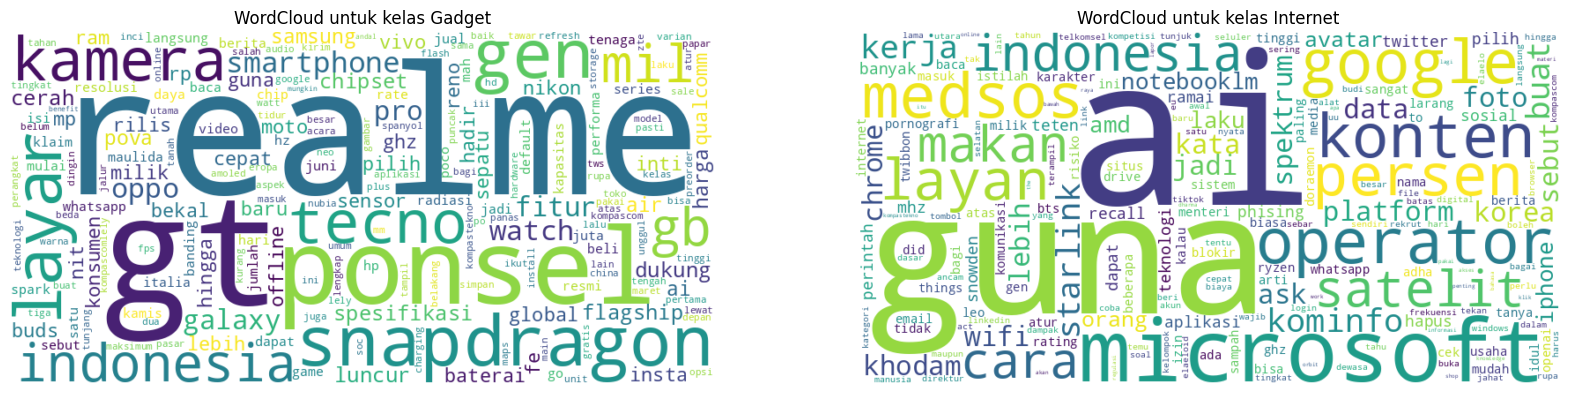

In [ ]:
# Pisahkan data berdasarkan kelas
class_gadget = df_final[df_final['class'] == 'gadget'].drop(columns='class')
class_internet = df_final[df_final['class'] == 'internet'].drop(columns='class')

# Hitung frekuensi TF-IDF untuk setiap kelas
tfidf_a = class_gadget.mean(axis=0).to_dict()
tfidf_b = class_internet.mean(axis=0).to_dict()

# Fungsi untuk membuat WordCloud
def generate_wordcloud(tfidf_dict):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    return wordcloud

# Generate WordClouds
wordcloud_gadget = generate_wordcloud(tfidf_a)
wordcloud_internet = generate_wordcloud(tfidf_b)

# Plotting berdampingan
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# WordCloud untuk kelas Gadget
axs[0].imshow(wordcloud_gadget, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('WordCloud untuk kelas Gadget')

# WordCloud untuk kelas Internet
axs[1].imshow(wordcloud_internet, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('WordCloud untuk kelas Internet')

plt.show()

In [ ]:
# Menyimpan hasil Dataframe TF-IDF ke dalam file excel
file_path = '/content/df_final.csv'
df_final.to_csv(file_path, index=False)
print("TF-IDF telah disimpan dalam file csv:", file_path)

TF-IDF telah disimpan dalam file csv: /content/df_final.csv


# Langkah 4 - Melatih Model

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = df_final.drop('class', axis=1)
y = df_final['class']

In [ ]:
# Inisialisasi model Naive Bayes
model = MultinomialNB()

In [ ]:
# Menerapkan cross-validation
# 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Cetak hasil cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [1.         0.91666667 0.91666667 0.91666667 0.91666667]
Mean cross-validation score: 0.9333333333333332


In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

MultinomialNB()

# Langkah 5 - Evaluasi Model

In [ ]:
# Prediksi dengan data pengujian
y_pred = model.predict(X_test)
print(y_pred)

['gadget' 'gadget' 'internet' 'internet' 'gadget' 'internet' 'internet'
 'gadget' 'gadget' 'gadget' 'internet' 'internet']


In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print('Laporan Klasifikasi:')
print(report)

Akurasi: 0.8333333333333334
Laporan Klasifikasi:
              precision    recall  f1-score   support

      gadget       0.67      1.00      0.80         4
    internet       1.00      0.75      0.86         8

    accuracy                           0.83        12
   macro avg       0.83      0.88      0.83        12
weighted avg       0.89      0.83      0.84        12

